In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV

In [7]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMart_Analysis/Train.csv")


# **Preprocessing and Data Analysis**


Look at the data-Training set:

In [8]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Testing Set:

In [9]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMart_Analysis/Test.csv")


In [10]:
test_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Size of the dataset:

In [12]:
print(f"training set (row, col): {train_data.shape}\n\ntesting set (row, col): {test_data.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)



preprocessing of the training dataset
**bold text**

In [13]:
train_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<ipython-input-13-e5638ef3face>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  train_data.info(verbose=True, null_counts=True)


In [14]:
# summary of the stat
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
# stat summary of the test data
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [16]:
#missing values in decsending order
"""missing data for each column by numbers and percentage"""
print("Train:\n")
print(train_data.isnull().sum().sort_values(ascending=False),"\n\n",train_data.isnull().sum()/train_data.shape[0] *100,"\n\n")
print("Test:\n")
print(test_data.isnull().sum().sort_values(ascending=False),"\n\n",test_data.isnull().sum()/test_data.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

Value counts for Outlet_Size and Item_Weight:


In [17]:
print("Outlet_Size:\n", train_data.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", test_data.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64 




Impute missing values with mode value

In [18]:
print("test mode, train mode\n",[train_data['Outlet_Size'].mode().values[0], test_data['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [19]:
#train
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(
train_data['Outlet_Size'].dropna().mode().values[0])

#test
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(
test_data['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
train_data['Outlet_Size'].isnull().sum(),test_data['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

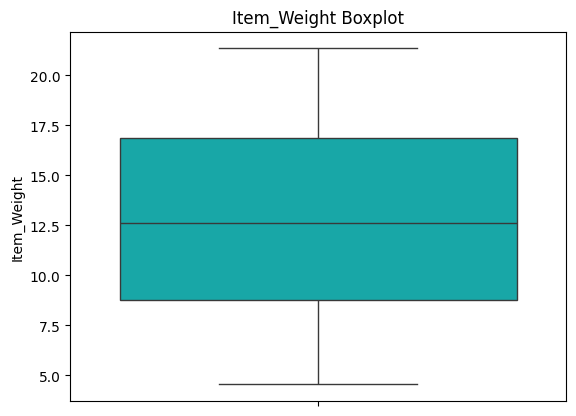

In [20]:
sns.boxplot(data=train_data['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")



*There are no outliers so we will fill the missing value with the mean value:*


In [21]:
#train
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(
train_data['Item_Weight'].dropna().mean())

#test
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(
test_data['Item_Weight'].dropna().mean())

#checking if we filled missing values
train_data['Item_Weight'].isnull().sum(),test_data['Item_Weight'].isnull().sum()


(0, 0)

In [22]:
print("train:\n")
print(train_data.info())
print("\n\ntest:\n")
print(test_data.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

# **Data Exploration**

split dataset in to categorical and numerical data

In [23]:
#list of all the numeric columns
num = train_data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = test_data.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  train_data[num]
#categoric df
BM_cat = test_data[cat]

#print(num)
#print(cat)

[train_data[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

Replace Repeating value

In [24]:
#train
train_data['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test_data['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
#Creating 'Outlet_Age' column in train_data
train_data['Outlet_Age'] = train_data['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

# Creating 'Outlet_Age' column in test_data
test_data['Outlet_Age'] = test_data['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

In [28]:
# train_data['Outlet_Age'].head()
test_data['Outlet_Age'].head()

0    21
1    13
2    22
3    13
4    35
Name: Outlet_Age, dtype: int64

**Data Visualization**

Univariate Plots



categorical columns:

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

<ipython-input-29-44c6c8a1201a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content' , data=train_data ,palette='mako')


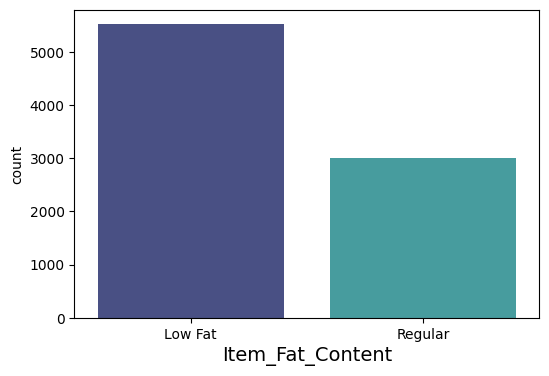

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train_data ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

<ipython-input-30-eb368fd848d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type' , data=train_data ,palette='summer')


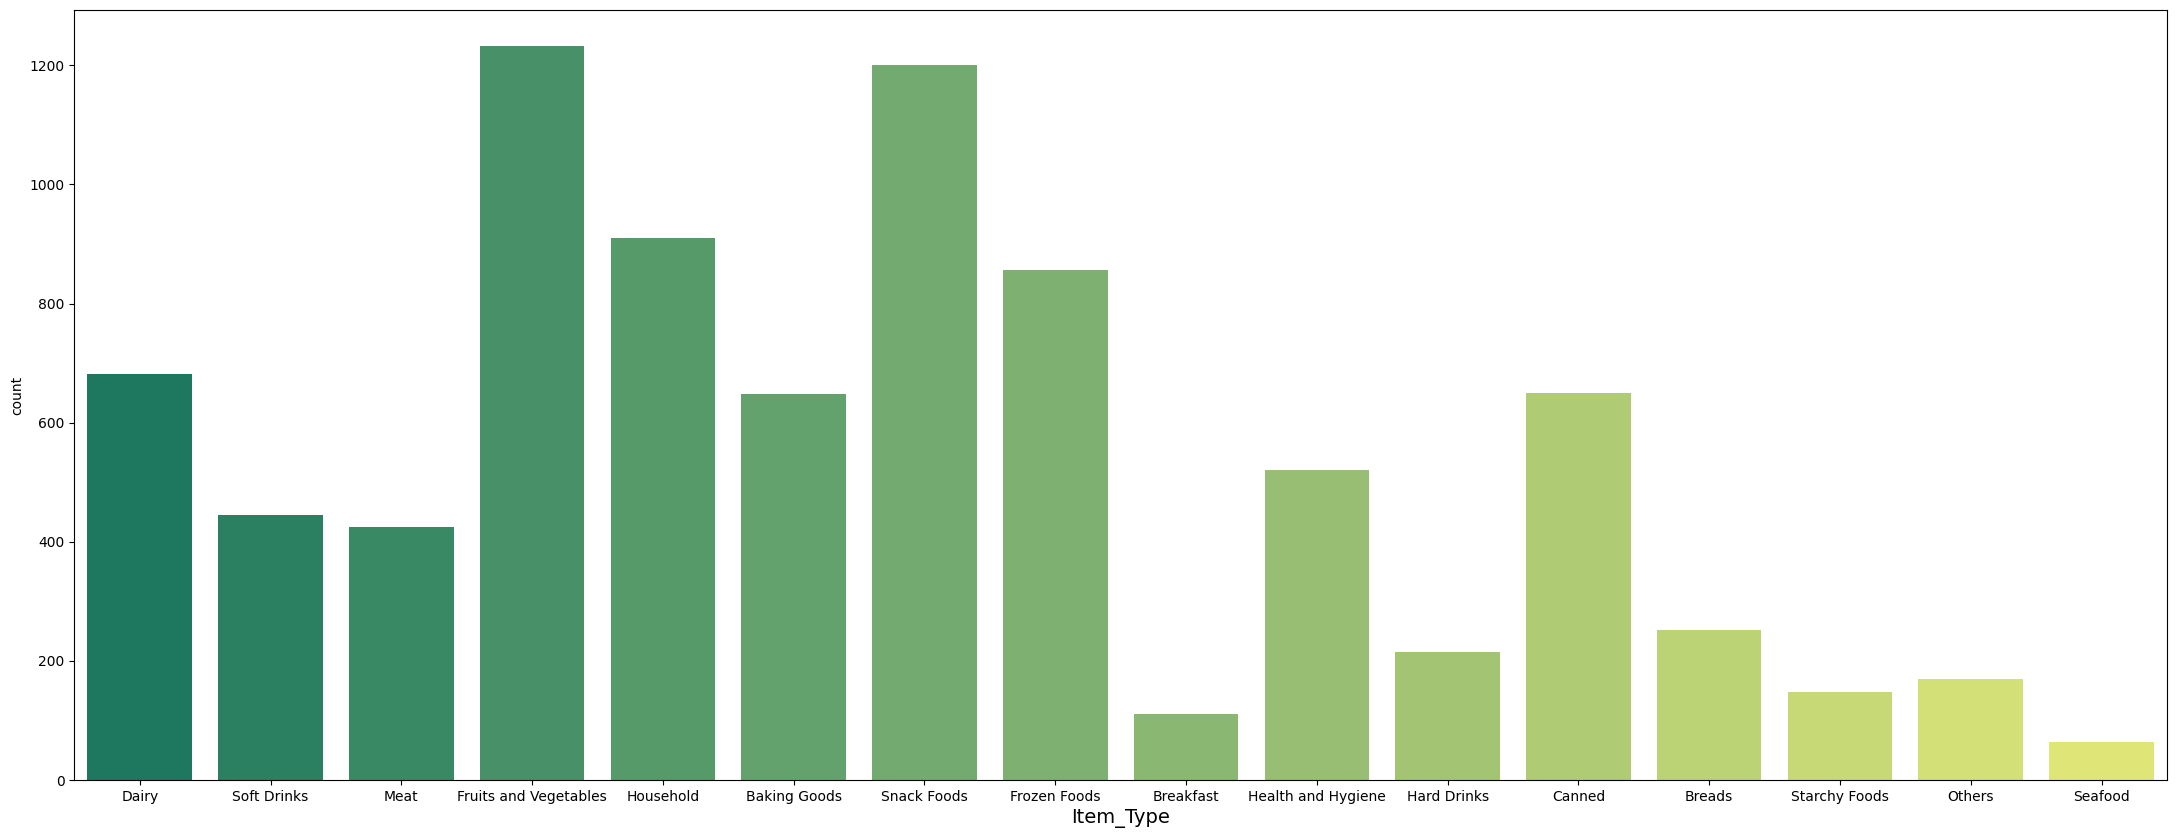

In [30]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train_data ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

<ipython-input-31-1d91d1fba2c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Identifier' , data=train_data ,palette='winter')


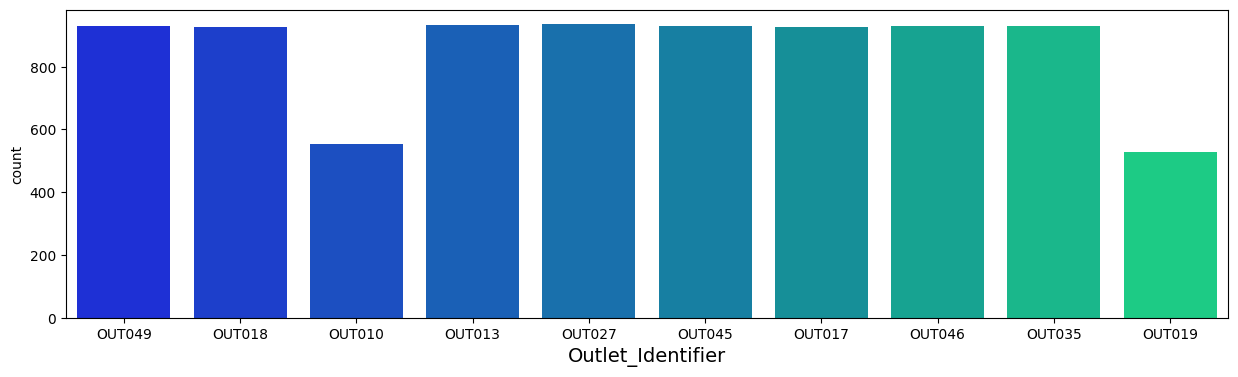

In [31]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=train_data ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

<ipython-input-32-857f6d27d431>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size' , data=train_data ,palette='autumn')


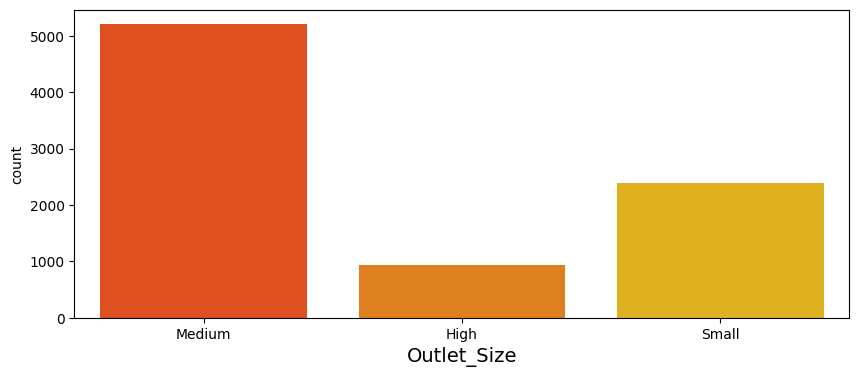

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train_data ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

<ipython-input-33-8de136046078>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Location_Type' , data=train_data ,palette='twilight_shifted')


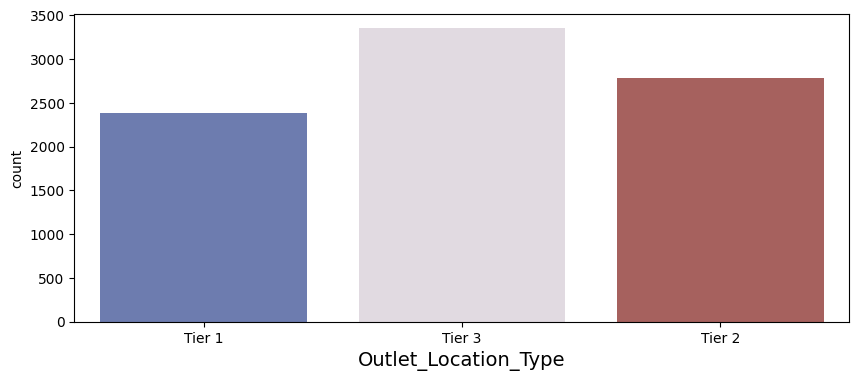

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train_data ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()



<ipython-input-34-5c41ca9d11b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Type' , data=train_data ,palette='rocket')


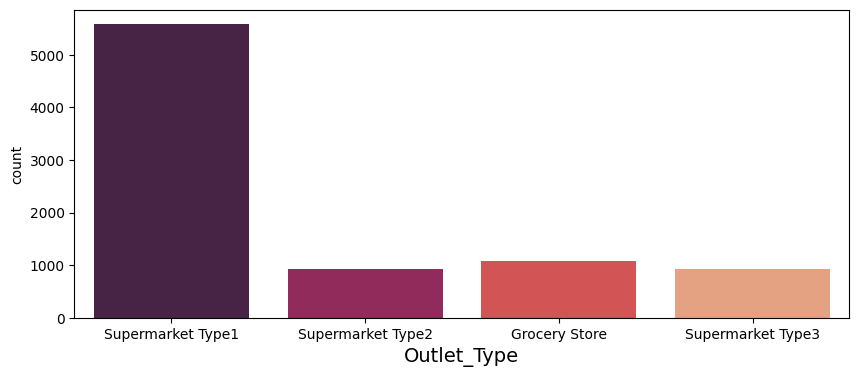

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train_data ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()


From Categoric columns we can realize

    Item_Fat_Content - Most items sold are low fat.
    Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.
    Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.
    Outlet_Size - Bigmart outlets are mostly medium sized in our data.
    Outlet_Location_Type - The most common type is Tier3.
    Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.


Now for the numerical columns

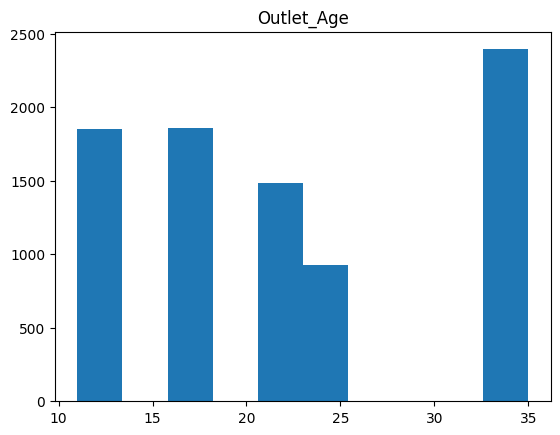

In [35]:
#list of all the numeric columns
num = train_data.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  train_data[num]

plt.hist(train_data['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

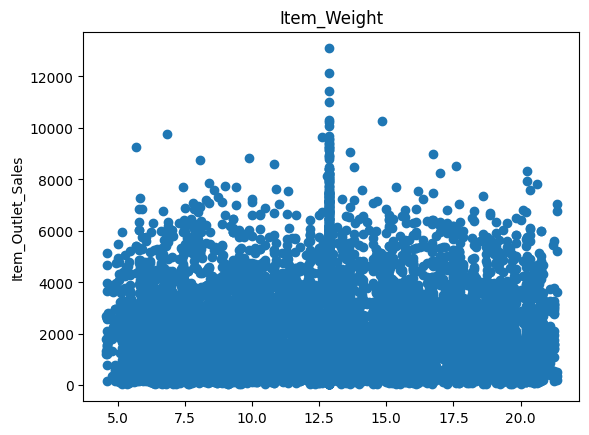

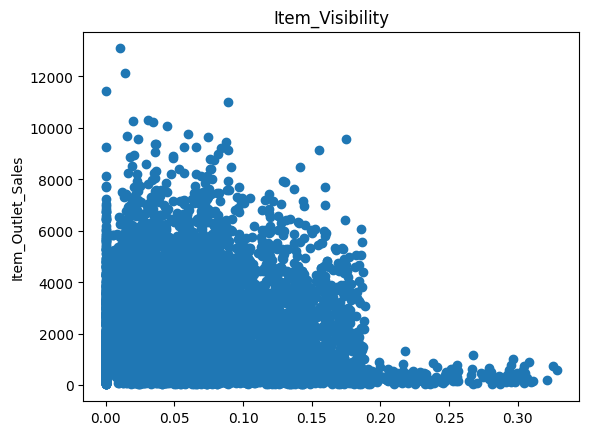

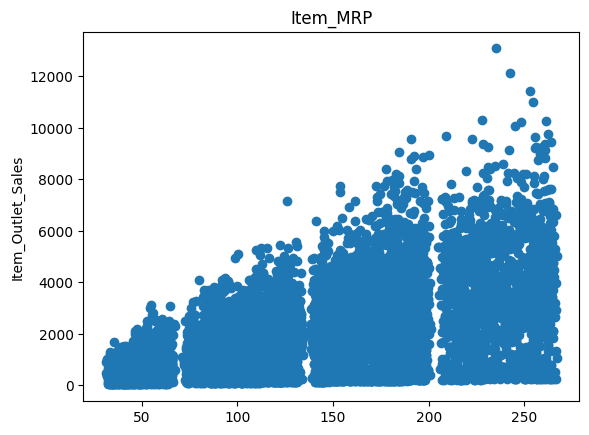

In [36]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()


numeric columns realizations

    Outlet_Age - The most common outlets are 35 years old.
    Item_Weight - The data is very spreaded, no specific pattern.
    Item_Visibility - Appears to be spreaded as well
    but some concentration around the (0,0) indicate
    small visibility items are not selling well is some cases.
    Item_MRP - Items with higher MRP tend to sell better in most cases.



**multivariate plots**

Checking  the following relationships with Item_Outlet_Sales:

    Sales per item type
    Sales per outlet
    Sales per outlet type
    Sales per outlet size
    Sales per location type


<ipython-input-37-afb5ff681de2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data, palette='gist_rainbow_r')


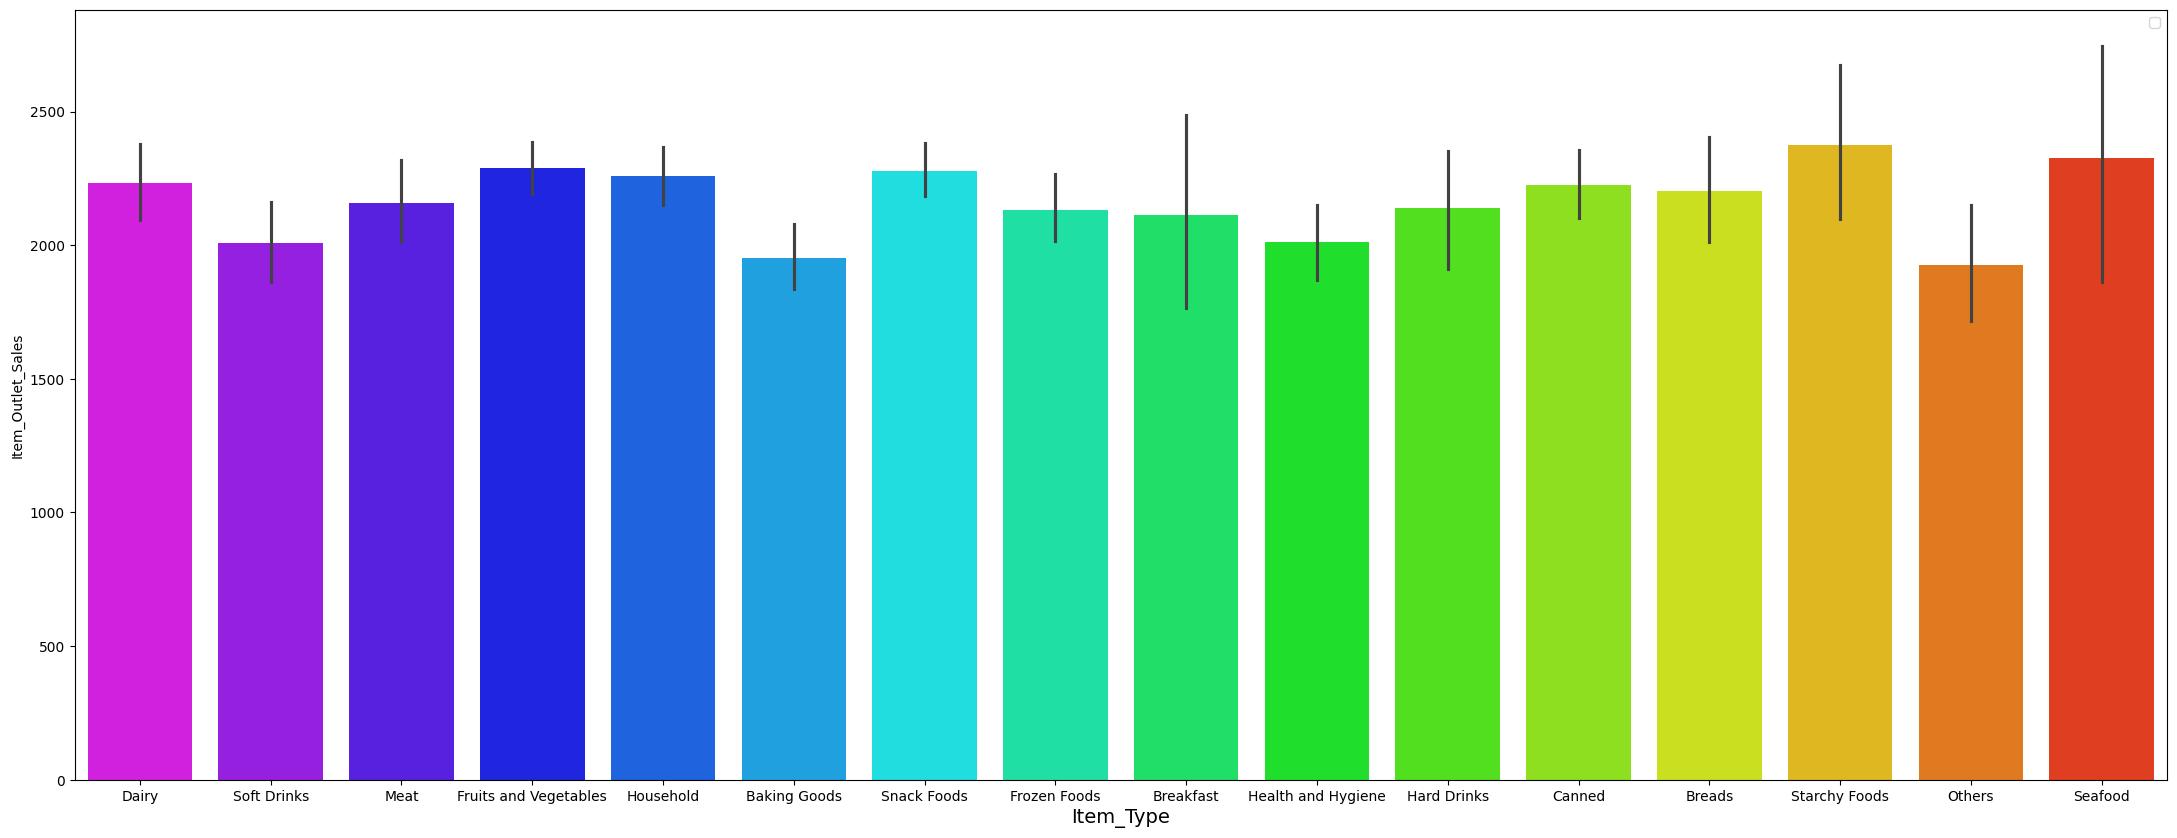

In [37]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data, palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

<ipython-input-38-39941818cbc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=train_data,palette='gist_rainbow')


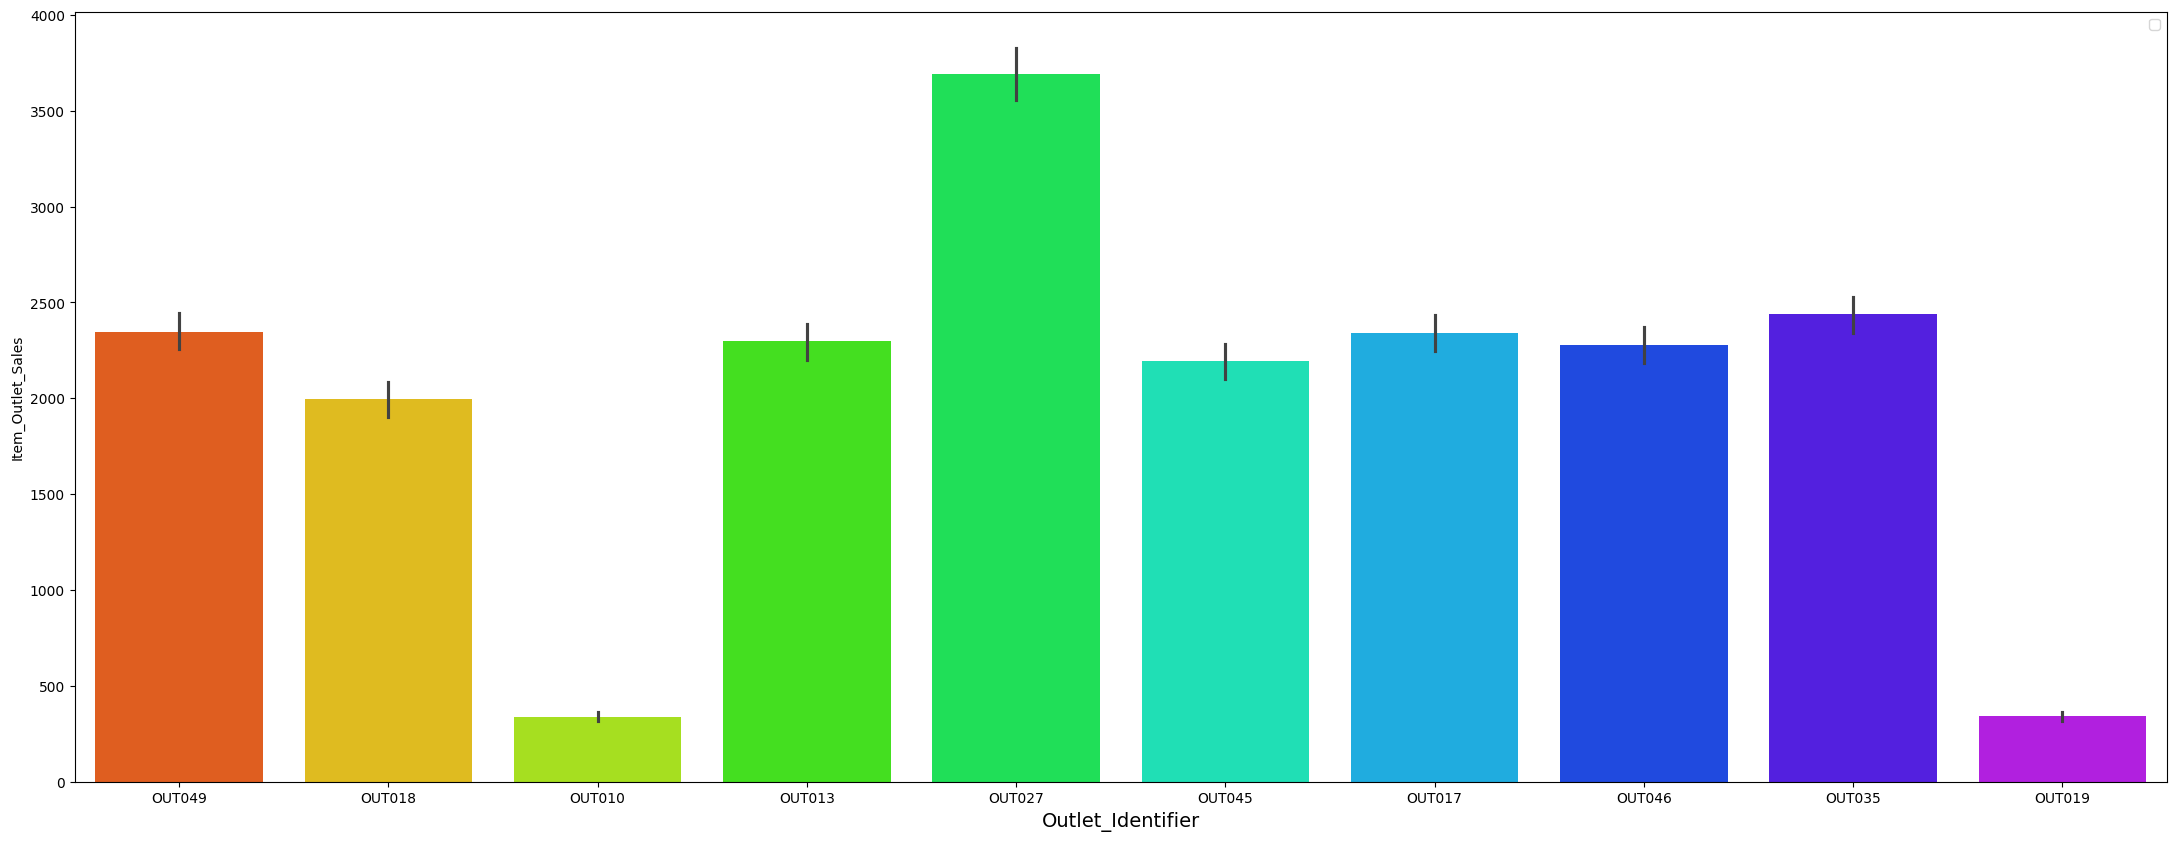

In [38]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=train_data,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

<ipython-input-39-a61737366969>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=train_data ,palette='nipy_spectral')


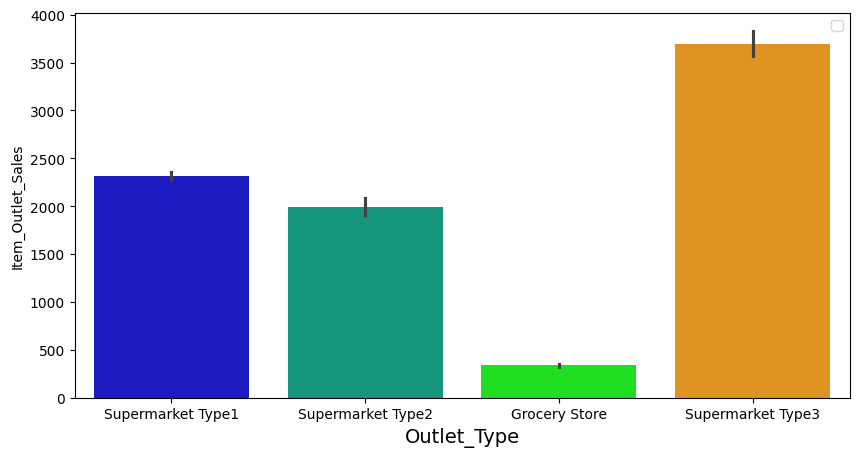

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=train_data ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

<ipython-input-40-7acf0c2e504f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=train_data,palette='YlOrRd')


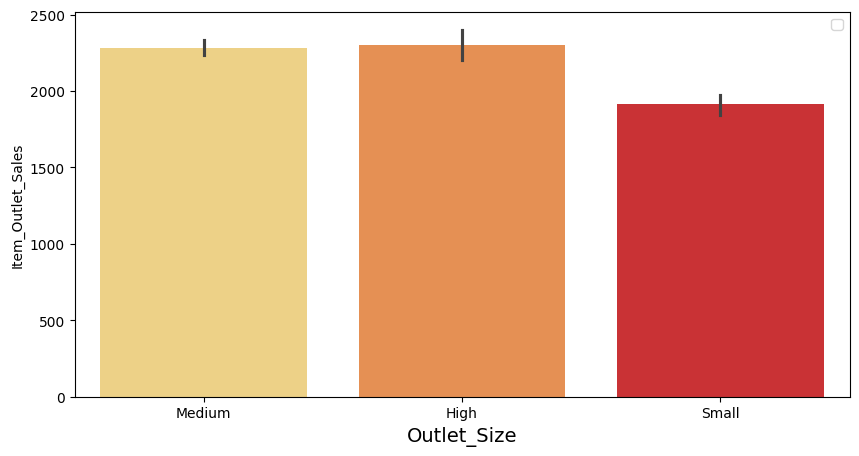

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=train_data,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

<ipython-input-41-3555d7d12883>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=train_data,palette='Spectral')


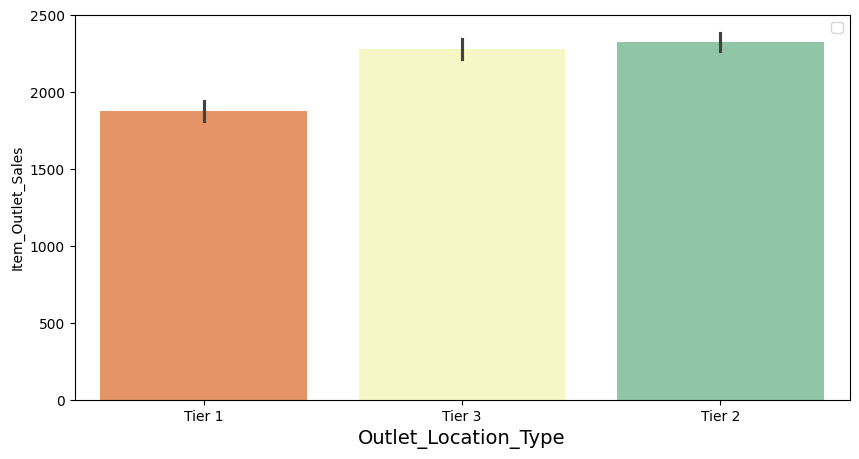

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=train_data,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()


Realizations:

    The difference in item types by sales is very small.
    Outlet 27 is the most profitable and there is a big
    diffrence between each specific outlet sales.
    Suprisingly supermarket type 3 is the most profitable and not type 1.
    Medium and high outlet sizes are pretty much even in sales.
    Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).




**Corraltion Matrix**


<ipython-input-42-248da6bdd562>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr() ,cmap='rocket')


<Axes: >

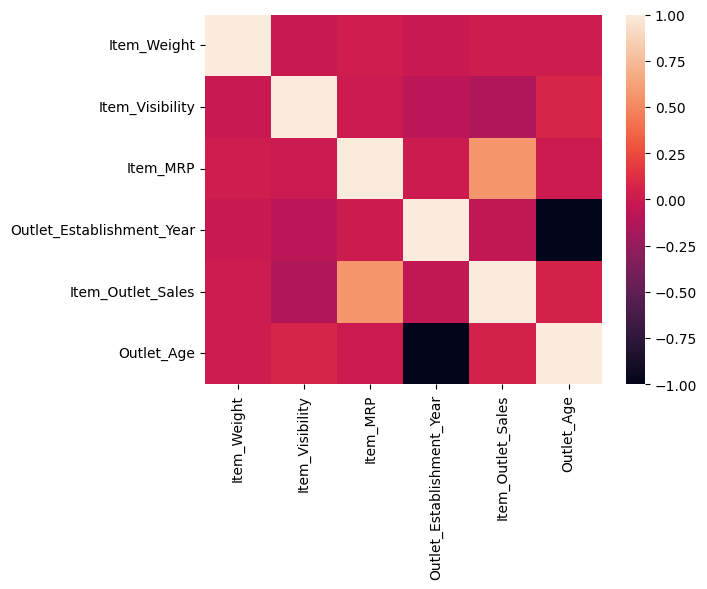

In [42]:
sns.heatmap(train_data.corr() ,cmap='rocket')



From the above figure we can see Item_Outlet_Sales is highly correlated with Item_MRP


# Feature Engineering

Categorical values:

We have 7 columns we need to delete or encode.

    Ordinal variables:
        Item_Fat_Content
        Outlet_Size
        Outlet_Location_Type

    Nominal variables:
        Item_Identifier
        Item_Type
        Outlet_Identifier
        Outlet_Type

Numeric values:

    From the numeric variables Outlet_Establishment_Year is no longer needed


Conclusion:

From FE process i have decided:

    The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier
    don't have significant values so we will drop them.
    All Ordinal variables will be Label encoded.
    The columns Outlet_Type and Item_Type will be One Hot encoded.


In [43]:
#checking the number of unique values in each column
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1543
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [44]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])

In [45]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [46]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train_data[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test_data[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
tr_oh.index = train_data.index
te_oh.index = test_data.index

# Add one-hot encoded columns to our main df new name:
tr_fe = pd.concat([train_data, tr_oh], axis=1)
te_fe = pd.concat([test_data, te_oh], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
# Dropping irrelevant columns
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [48]:
tr_fe.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


# Machine learning models

In [49]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0) # spliting data into train and test

In [50]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

*Linear Regression*

In [51]:
LR = LinearRegression()

LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.19

 Mean Squared Error: 1285793.54

 R^2 Score: 0.5593

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


*L1 regularization:Lasso regression*

In [52]:
LS = Lasso(alpha = 0.05)
LS.fit(X_train,y_train)

y_predict = LS.predict(X_test)

LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.07

 Mean Squared Error: 1285554.86

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


*L2 regularization:Ridge regression*

In [53]:
RR = Ridge(alpha=0.05)

RR.fit(X_train, y_train)

y_predict_ridge = RR.predict(X_test)

# Score variables
RR_MAE = round(MAE(y_test, y_predict_ridge), 2)
RR_MSE = round(MSE(y_test, y_predict_ridge), 2)
RR_R2 = round(R2(y_test, y_predict_ridge), 4)
RR_CS = round(CVS(RR, X, y, cv=5).mean(), 4)

print(f"Mean Absolute Error (Ridge): {RR_MAE}")
print(f"Mean Squared Error (Ridge): {RR_MSE}")
print(f"R^2 Score (Ridge): {RR_R2}")
print(f"Cross-Validation Score (Ridge): {RR_CS}")

cross_val(RR, Ridge(alpha=0.05), X, y, 5)

Mean Absolute Error (Ridge): 838.16
Mean Squared Error (Ridge): 1285756.01
R^2 Score (Ridge): 0.5593
Cross-Validation Score (Ridge): 0.558
Ridge(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Ridge(alpha=0.05) score: 0.558


*Random Forest Regressor*

Hyperparameter Tuning For a random forest regression:

n_estimators — number of trees in the forest
max_depth — maximum depth in a tree
min_samples_split — minimum number of data points before the sample is split
min_samples_leaf — minimum number of leaf nodes that are required to be sampled
bootstrap — sampling for data points, true or false
random_state — generated random numbers for the random forest.

In [55]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],
'max_depth': np.arange(1, 15, 1),
'min_samples_split': [2, 10, 9],
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
'bootstrap': [True, False],
'random_state': [1, 2, 30, 42]
}
RFR = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=10, n_jobs=-1, verbose=2, n_iter=200)
RFR_fit=RFR.fit(X_train, y_train)
best_parameters = RFR_fit.best_params_
print(best_parameters)


In [58]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=101, min_samples_split=2, min_samples_leaf=10, max_depth=5, bootstrap=True)
rfr_model.fit(X_train, y_train)
y_predict = rfr_model.predict(X_test)

In [ ]:
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [ ]:
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

*XGBoost Regressor*

In [ ]:
grid_xgb = {
    'n_estimators': [20, 50, 100, 500, 1000],
    'max_depth': np.arange(1, 15, 1),
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'gamma': [0, 0.1, 0.3, 0.5],
    'random_state': [1, 2, 30, 42]
}

xgb_model = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=grid_xgb, cv=10, n_iter=200, n_jobs=-1, verbose=2)
xgb_random.fit(X_train, y_train)

best_parameters_xgb = xgb_random.best_params_
print(best_parameters_xgb)

Mean Absolute Error (XGBoost): 826.84
Mean Squared Error (XGBoost): 1396070.07
R^2 Score (XGBoost): 0.5215
Cross-Validation Score (XGBoost): 0.5626
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=4,
             num_parallel_tree=None, random_state=101, ...) Scores:
0.54
0.5
0.48
0.52
0.52
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             c

In [ ]:
# xgb_model_best = XGBRegressor(**best_parameters_xgb)
xgb_model_best = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1,gamma=0.3,n_jobs=4, random_state=101)
xgb_model_best.fit(X_train, y_train)
y_pred_xgb = xgb_model_best.predict(X_test)

In [ ]:
xgb_mae = round(MAE(y_test, y_pred_xgb), 2)
xgb_mse = round(MSE(y_test, y_pred_xgb), 2)
xgb_r2 = round(R2(y_test, y_pred_xgb), 4)
xgb_cv_score = round(CVS(xgb_random, X, y, cv=5).mean(), 4)

In [ ]:
print(f" Mean Absolute Error: {xgb_mae}\n")
print(f" Mean Squared Error: {xgb_mse}\n")
print(f" R^2 Score: {xgb_r2}\n")
print(f" Cross-validation Score: {xgb_cv_score}\n")

# Summary